In [5]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
data=load_iris()
X = data.data
y = data.target.reshape(-1, 1)

In [7]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
def train_model(activation):
    model = Sequential([
        Dense(64, activation=activation, input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, verbose=0)
    return history.history['loss']

In [10]:
relu_loss = train_model('relu')
sigmoid_loss = train_model('sigmoid')
tanh_loss = train_model('tanh')

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


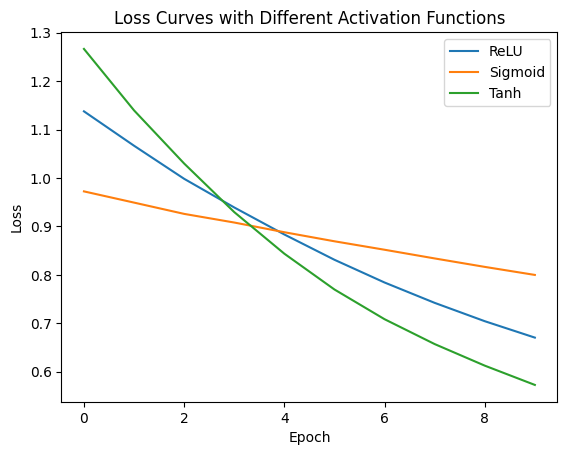

In [11]:

plt.plot(relu_loss, label='ReLU')
plt.plot(sigmoid_loss, label='Sigmoid')
plt.plot(tanh_loss, label='Tanh')
plt.title('Loss Curves with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()